# Diamond Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
# from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Discovering the train dataset

In [3]:
train = pd.read_csv('C:\\Users\\USER\\Desktop\\Diamonds\\train.csv')

In [4]:
train.head()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   

      y     z  
0  3.84  2.31  
1  4.23  2.63  
2  4.35  2.75  
3  3.96  2.48  
4  3.98  2.47

In [5]:
train.shape

(43040, 11)

In [6]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [8]:
train.describe()

Unnamed: 0         carat         depth         table         price  \
count  43040.000000  43040.000000  43040.000000  43040.000000  43040.000000   
mean   26758.804554      0.796964     61.746080     57.439542   3942.706343   
std    15484.904515      0.481455      1.435246      2.240196   4023.534556   
min        2.000000      0.200000     43.000000     43.000000    326.000000   
25%    13326.750000      0.380000     61.000000     56.000000    940.000000   
50%    26824.500000      0.710000     61.800000     57.000000   2388.000000   
75%    40290.250000      1.030000     62.500000     59.000000   5309.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43040.000000  43040.000000  43040.000000  
mean       5.724376      5.728122      3.534367  
std        1.132496      1.159641      0.714543  
min        0.000000      0.000000      0.000000  
25%        4.660000      4.670000      2.870000  
50%        5.710000      5.720000      3.530000  
75%        6.500000      6.500000      4.020000  
max       10.740000     58.900000     31.800000

In [9]:
#all the numerical features in the dataset.
numerical_features=[]
for features in train:
    numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
train[numerical_features].head()

Unnamed: 0  carat  depth  table  price     x     y     z
0           2   0.21   59.8   61.0    326  3.89  3.84  2.31
1           4   0.29   62.4   58.0    334  4.20  4.23  2.63
2           5   0.31   63.3   58.0    335  4.34  4.35  2.75
3           6   0.24   62.8   57.0    336  3.94  3.96  2.48
4           7   0.24   62.3   57.0    336  3.95  3.98  2.47

In [10]:
# Identify Rows That Contain Duplicate Data
dup = train.duplicated()
dup.sum()

0

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

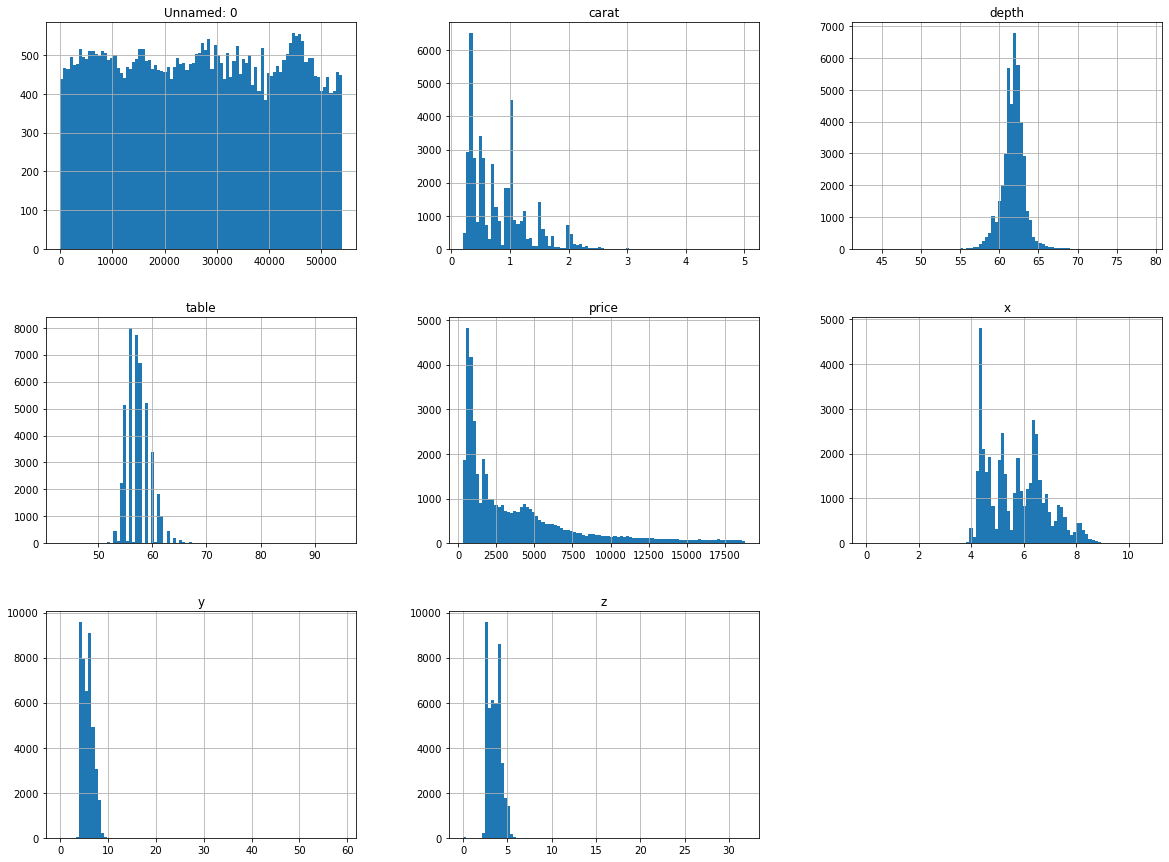

In [11]:
train.hist(bins = 90, figsize=(20,15))

# Handiling Outliers using IQR

In [12]:
 # We noticed that there are zeros in (x,y,z) columns, and wee have to remove these rows
 #Dropping dimentionless diamonds
train = train.drop(train[train["x"]==0].index)
train = train.drop(train[train["y"]==0].index)
train = train.drop(train[train["z"]==0].index)


train = train.drop(train[train["x"]==''].index)
train = train.drop(train[train["y"]==''].index)
train = train.drop(train[train["z"]==''].index)
train.shape

(43023, 11)

Boxplot helps in discovering and visualizing the outliers and the 3Qs (Q1, Q2, Q3)

<function matplotlib.pyplot.show(close=None, block=None)>

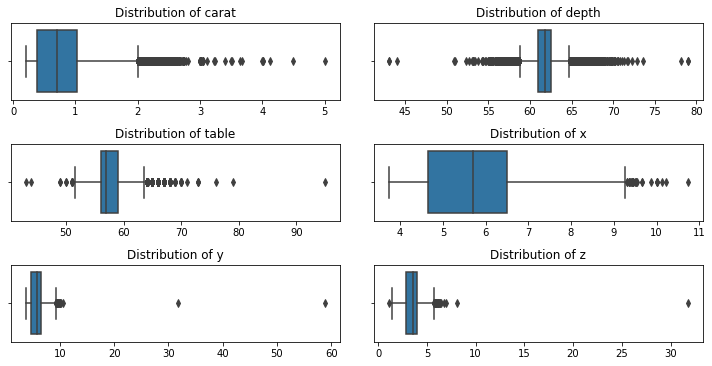

In [13]:
df_count= train.select_dtypes([int,float])
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_count.columns, 1):
    ax = plt.subplot(6,2,i)
    sns.boxplot(data = df_count, x = df_count[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

Droping the  outliers values using the IQR method

min outliers = Q1 - (1.5*IQR)

max outliers = Q3 + (1.5*IQR)

In [14]:
for x in ['carat']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [15]:
for x in ['depth']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [16]:
for x in ['table']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [17]:
for x in ['x']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [18]:
for x in ['y']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [19]:
for x in ['z']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [20]:
train.isnull().sum()

Unnamed: 0       0
carat         1654
cut              0
color            0
clarity          0
depth         1996
table          476
price            0
x               24
y               24
z               29
dtype: int64

In [21]:
train = train.dropna(axis = 0)
train.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [22]:
train.shape

(39241, 11)

# Features Selection

In [23]:
corr_matrix = train.corr()
corr_matrix

Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.446746 -0.046965 -0.127117 -0.361241 -0.448882   
carat        -0.446746  1.000000  0.022735  0.183823  0.910590  0.984930   
depth        -0.046965  0.022735  1.000000 -0.241785 -0.006404 -0.021206   
table        -0.127117  0.183823 -0.241785  1.000000  0.124641  0.185653   
price        -0.361241  0.910590 -0.006404  0.124641  1.000000  0.876637   
x            -0.448882  0.984930 -0.021206  0.185653  0.876637  1.000000   
y            -0.449422  0.984192 -0.022602  0.180140  0.877941  0.998640   
z            -0.452452  0.983637  0.078541  0.159333  0.873446  0.993634   

                   y         z  
Unnamed: 0 -0.449422 -0.452452  
carat       0.984192  0.983637  
depth      -0.022602  0.078541  
table       0.180140  0.159333  
price       0.877941  0.873446  
x           0.998640  0.993634  
y           1.000000  0.993459  
z           0.993459  1.000000

Notice that the correlation between price and depth, and the correlation between price and table are the lowest 

In [24]:
corr_matrix['price'].abs().sort_values(ascending=False)

price         1.000000
carat         0.910590
y             0.877941
x             0.876637
z             0.873446
Unnamed: 0    0.361241
table         0.124641
depth         0.006404
Name: price, dtype: float64

The distribution of the data after dropping the outliers

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

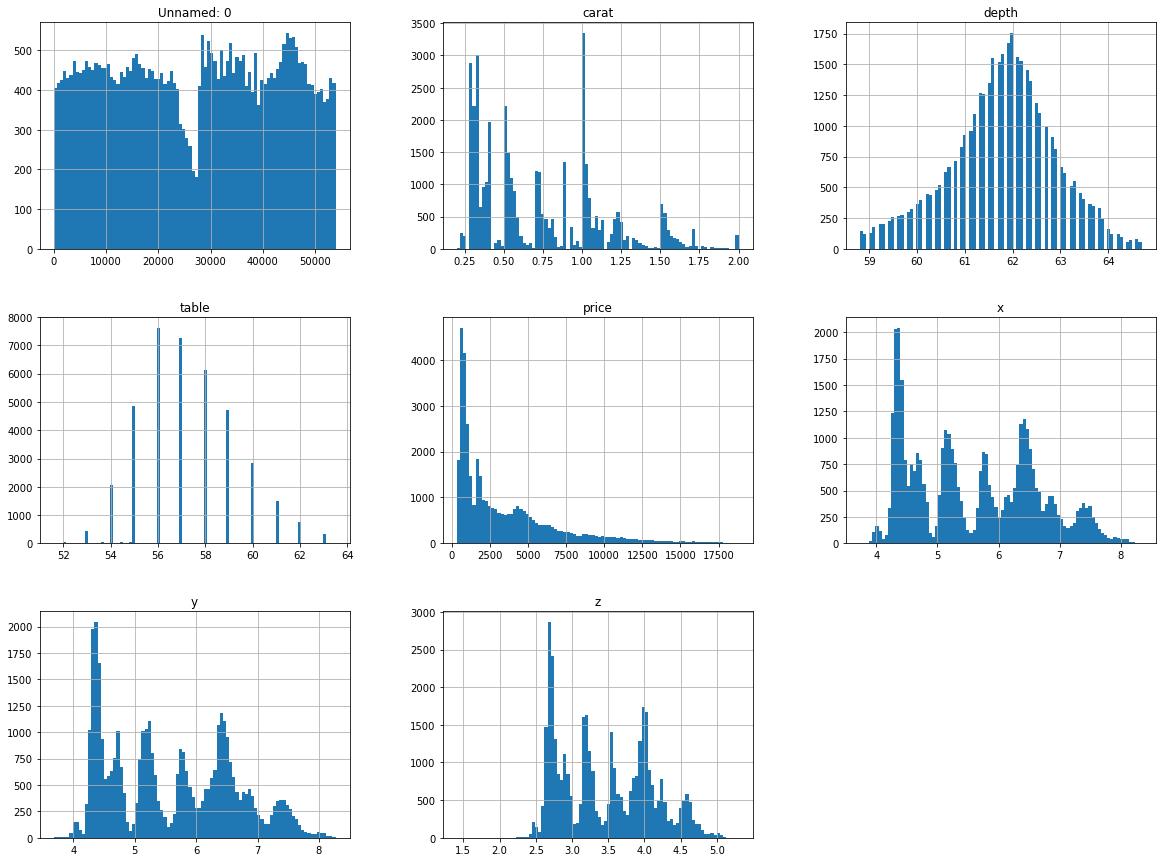

In [25]:
train.hist(bins = 90, figsize=(20,15))

Also, BoxenPlot shows the distribution and the 3Qs

<function matplotlib.pyplot.show(close=None, block=None)>

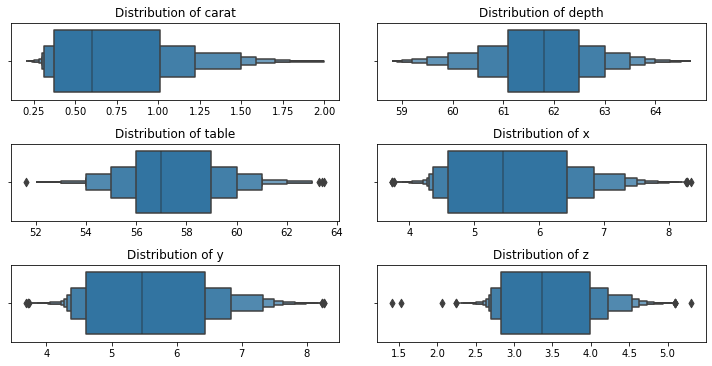

In [26]:
df_count= train.select_dtypes([int,float])
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_count.columns, 1):
    ax = plt.subplot(6,2,i)
    sns.boxenplot(data = df_count, x = df_count[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

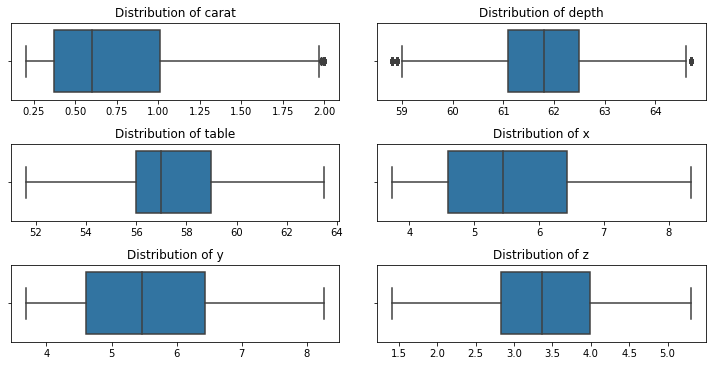

In [27]:
df_count= train.select_dtypes([int,float])
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_count.columns, 1):
    ax = plt.subplot(6,2,i)
    sns.boxplot(data = df_count, x = df_count[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='carat', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='depth', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='table', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='price', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='x', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='y', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='z', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='depth', ylabel='carat'>,
        <AxesSubplot:xlabel='table', ylabel='carat'>,
        <AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='depth'>,
        <AxesSubplot:xlabel='carat', ylabel='dept

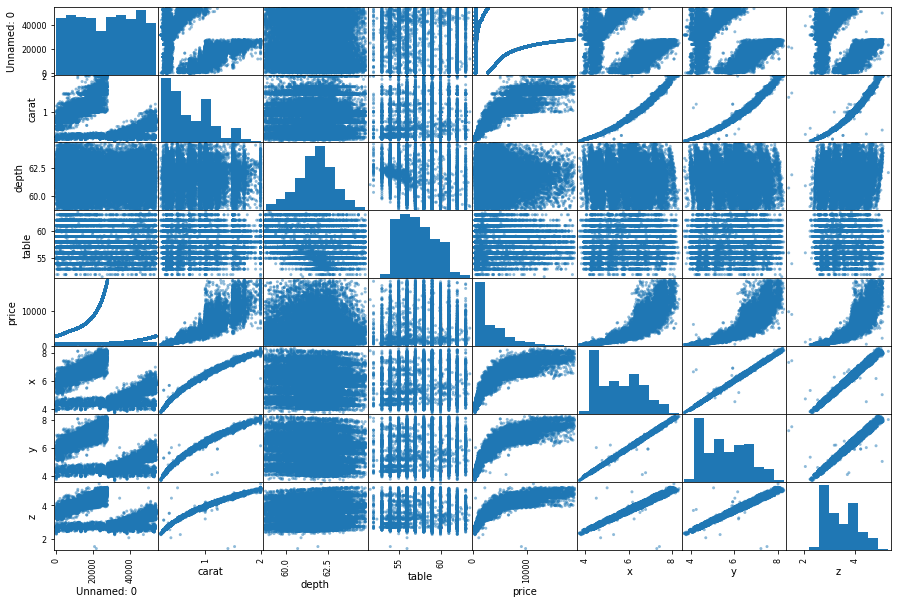

In [28]:
from pandas.plotting import scatter_matrix
# attributes = numerical_features
scatter_matrix(train[numerical_features], figsize=(15, 10))


<AxesSubplot:xlabel='price', ylabel='x'>

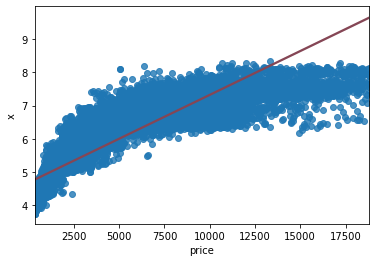

In [29]:
sns.regplot(data = train, x = 'price', y='x', fit_reg= True, line_kws={'color':'#854655'})

<AxesSubplot:xlabel='price', ylabel='y'>

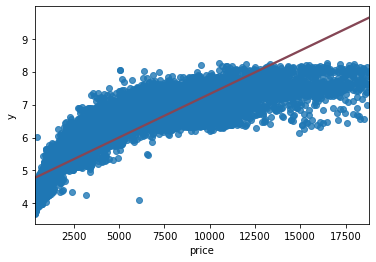

In [30]:
sns.regplot(data = train, x = 'price', y='y', fit_reg= True, line_kws={'color':'#854655'})

<AxesSubplot:xlabel='price', ylabel='z'>

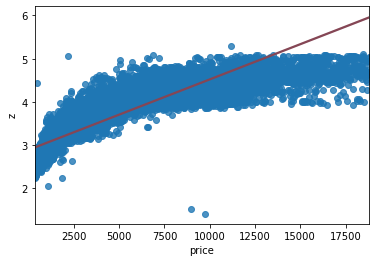

In [31]:
sns.regplot(data = train, x = 'price', y='z', fit_reg= True, line_kws={'color':'#854655'})

<AxesSubplot:xlabel='price', ylabel='carat'>

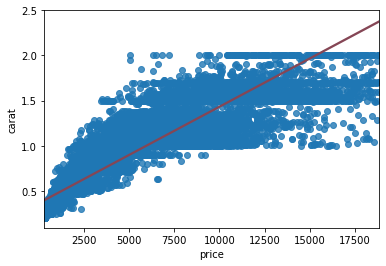

In [32]:
sns.regplot(data = train, x = 'price', y='carat', fit_reg= True, line_kws={'color':'#854655'})

<AxesSubplot:xlabel='price', ylabel='depth'>

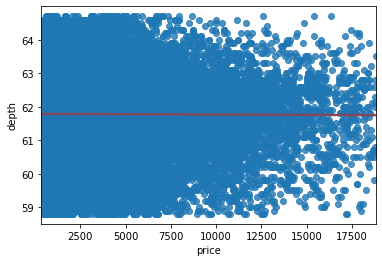

In [33]:
sns.regplot(data = train, x = 'price', y='depth', fit_reg= True, line_kws={'color':'#854655'})

<AxesSubplot:xlabel='price', ylabel='table'>

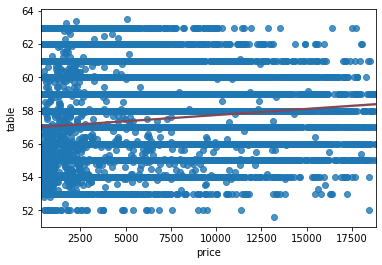

In [34]:
sns.regplot(data = train, x = 'price', y='table', fit_reg= True, line_kws={'color':'#854655'})

# Preparing the data 

Preparing Train data

Encoding the text features 

In [35]:
def feature_encoder(df):
  df['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
  df['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
  df['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

In [36]:
feature_encoder(train)

In [37]:
train

Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               2   0.21    4      6        3   59.8   61.0    326  3.89   
1               4   0.29    4      2        4   62.4   58.0    334  4.20   
2               5   0.31    2      1        2   63.3   58.0    335  4.34   
3               6   0.24    3      1        6   62.8   57.0    336  3.94   
4               7   0.24    3      2        7   62.3   57.0    336  3.95   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
43035       53935   0.72    4      7        3   62.7   59.0   2757  5.69   
43036       53936   0.72    5      7        3   60.8   57.0   2757  5.75   
43037       53937   0.72    2      7        3   63.1   55.0   2757  5.69   
43038       53939   0.86    4      3        2   61.0   58.0   2757  6.15   
43039       53940   0.75    5      7        2   62.2   55.0   2757  5.83   

          y     z  
0      3.84  2.31  
1      4.23  2.63  
2      4.35  2.75  
3      3.96  2.48  
4      3.98  2.47  
...     ...   ...  
43035  5.73  3.58  
43036  5.76  3.50  
43037  5.75  3.61  
43038  6.12  3.74  
43039  5.87  3.64  

[39241 rows x 11 columns]

In [38]:
y_train = train['price']

Dropping unwanted columns and the price 

In [39]:
train.drop('price',inplace = True, axis = 1)
train.drop('depth',inplace = True, axis = 1)
train.drop('table',inplace = True, axis = 1)

Preparing Test data

In [40]:
test = pd.read_csv('C:\\Users\\USER\\Desktop\\Diamonds\\test.csv')

In [41]:
index = test[['Unnamed: 0']]
test.drop('depth',inplace = True, axis = 1)
test.drop('table',inplace = True, axis = 1)

In [42]:
feature_encoder(test)

# Train the XGB Regressor algorithm 

In [43]:
xgb = XGBRegressor()
xgb.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
preds = xgb.predict(test)

In [45]:
submission = index
submission

Unnamed: 0
0               1
1               3
2               8
3              10
4              12
...           ...
10895       53922
10896       53923
10897       53933
10898       53934
10899       53938

[10900 rows x 1 columns]

In [46]:
submission['price'] = preds.tolist()

<ipython-input-46-3e25c4be0db5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price'] = preds.tolist()


In [47]:
submission.to_csv('submission_XGBRegressor10.csv',index=None)